<a href="https://colab.research.google.com/github/Marta-Michalik/ML_pistachio_project/blob/main/MLiN_final_project_Marta_Michalik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#dowloading and unzipping data
!wget https://www.muratkoklu.com/datasets/Pistachio_Image_Dataset.zip
!unzip Pistachio_Image_Dataset.zip -d my_data

--2022-06-21 22:02:01--  https://www.muratkoklu.com/datasets/Pistachio_Image_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27859492 (27M) [application/zip]
Saving to: ‘Pistachio_Image_Dataset.zip.1’

Pistachio_Image_Dat 100%[===================>]  26.57M  11.1MB/s    in 2.4s    

2022-06-21 22:02:05 (11.1 MB/s) - ‘Pistachio_Image_Dataset.zip.1’ saved [27859492/27859492]

Archive:  Pistachio_Image_Dataset.zip
replace my_data/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Dataset contains pictures of two different pistachio species. It is hard to tell them apart, hence the CNN algorithm.  

In [ ]:
#making two labels
class_label = {
    'Kirmizi_Pistachio': 0,
    'Siirt_Pistachio': 1
}


In [ ]:
#reshape, normalize data and store it in a numpy array

x = []
y = []

dir = 'my_data/Pistachio_Image_Dataset/Pistachio_Image_Dataset'

for directory in os.listdir(dir):
    if('.txt' in directory): continue
    for file in os.listdir(dir+'/'+directory):
        image_path = dir+'/'+directory+'/'+file
        img = cv2.imread(image_path).astype('float32') 
        img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
        img/=255.
        x.append(img)
        y.append(class_label[directory])
x = np.array(x)
y = np.array(y)

#split to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

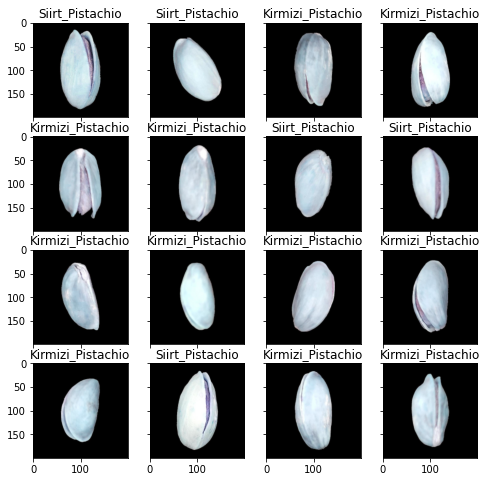

In [ ]:
#visualizing data
import matplotlib.pyplot as plt
import random

def print_imgs(x_set, y_set, names):
    fig, ax = plt.subplots(4, 4, figsize=(8, 8), sharex='col', sharey='row')
    for x in range(4):
        for y in range(4):
            idx = random.randint(0, x_set.shape[0]-1)
            ax[x,y].imshow(x_set[idx])
            ax[x,y].set_title(names[int(y_set[idx])])

print_imgs(x_train, y_train, ['Kirmizi_Pistachio', 'Siirt_Pistachio' ])

The CNN contains 6 Convolutional layers with Relu activation, where each 2 is followed by Max Pooling layer (3 in total). 

Next is Dropout layer with rate 0.2 and Flatten layer. 
After that, there is first fully connected layer with Relu activation, followed by Dropout layer with rate 0.1. Next are two fully connectec layers, first with Relu activation and the second one with Sigmoid activation.

It has a total of 29,655,169 trainable parameters. 

In [ ]:
# CNN model

model = Sequential()


model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,'sigmoid'))

model.compile('Adam','binary_crossentropy',['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                    

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 128, epochs=12)

Epoch 1/12
12/12 [==============================] - 558s 47s/step - loss: 0.5139 - accuracy: 0.7408 - val_loss: 0.3742 - val_accuracy: 0.8279
Epoch 2/12
12/12 [==============================] - 590s 49s/step - loss: 0.4326 - accuracy: 0.7964 - val_loss: 0.3756 - val_accuracy: 0.8209
Epoch 3/12
12/12 [==============================] - 647s 54s/step - loss: 0.4058 - accuracy: 0.8068 - val_loss: 0.3887 - val_accuracy: 0.8364
Epoch 4/12
12/12 [==============================] - 648s 54s/step - loss: 0.3730 - accuracy: 0.8290 - val_loss: 0.3292 - val_accuracy: 0.8618
Epoch 5/12
12/12 [==============================] - 628s 53s/step - loss: 0.3666 - accuracy: 0.8388 - val_loss: 0.3423 - val_accuracy: 0.8632
Epoch 6/12
12/12 [==============================] - 604s 50s/step - loss: 0.3418 - accuracy: 0.8478 - val_loss: 0.3081 - val_accuracy: 0.8618
Epoch 7/12
12/12 [==============================] - 600s 50s/step - loss: 0.3159 - accuracy: 0.8659 - val_loss: 0.2988 - val_accuracy: 0.8660
Epoch 

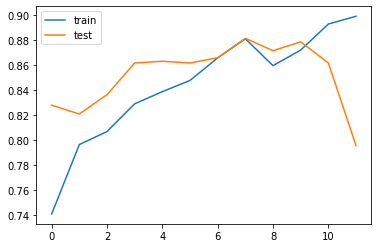

In [ ]:
#plotting accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

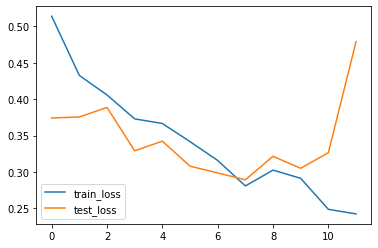

In [ ]:
#plotting loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

Looking at the plots of accuracy and loss, it can be said that the model is getting quite good results of 88% validation accuracy and loss below 30% . With batch size 128, the model may be trained on 8 epochs, as it could be noticed on the plots, that after the model is overfitting (decreasing accuracy and rising loss). 